In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import json
import datetime as dt
import matplotlib.dates as mdates
import unidecode
from plotly.subplots import make_subplots
from get_data import read_data, get_data, download_csv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd

In [2]:
#with open('dados/geojs_bairros_rj.json', encoding='utf-8') as fh:
#    geom = json.load(fh)

In [3]:
#good_names = [bairro['properties']['NOME'] for bairro in geom['features']]
#df_bairros['good_names'] = good_names

In [4]:
#geom['features'][143]

In [5]:
#df_bairros = df_bairros.drop(index = [143, 148, 150])


In [6]:
#df_bairros.loc[142]

In [7]:
#fig = px.choropleth(df_bairros, geojson = geom, locations='good_names', color='Casos',
#                           color_continuous_scale = "ylorrd",
#                           range_color=(0,60),featureidkey="properties.NOME",
#                           labels={'Casos Acumulados':'Casos por 100k habitantes'}
#                          )
#fig.update_geos(fitbounds="locations", visible=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_text = f'Casos Confirmados por 100 mil habitantes', 
#                  title_y = 0.93, title_x = 0.1)
#fig.show()

# Começa aqui o Matplotlib

In [8]:
df_bairros = gpd.read_file('dados/geojs_bairros_rj.json')
df_bairros['NOME'] = [unidecode.unidecode(x.upper().strip()) for x in list(df_bairros['NOME'])]
#good_names = [bairro['properties']['NOME'] for bairro in geom['features']]
#df_bairros['good_names'] = good_names

In [9]:
dados_pop_rj = pd.read_csv('dados/Pop_2010_Bairros_2020-2.csv', encoding = 'ISO-8859-1')

In [10]:
dados_pop_rj['NOME'] = [unidecode.unidecode(x.upper().strip()) for x in list(dados_pop_rj['NOME'])]

In [11]:
dados_covid_rj = pd.read_csv('dados/Dados_indiv_MRJ_covid19_27-4-2020.csv', encoding = 'ISO-8859-1', delimiter = ';')
dados_covid_rj.drop(columns = ['Data_atualização'], inplace = True)

In [12]:
dados_covid_rj = read_data(dados_covid_rj, fonte = 'prefeitura')

In [13]:
nomes = list(dados_covid_rj['Bairro'])
dados_covid_rj.drop(columns = ['Bairro'], inplace = True)

In [14]:
#dados_covid_rj

In [15]:
new_names = []
for nome in nomes:
    if nome == 'FREGUESIA-JPA':
        nome = 'FREGUESIA (JACAREPAGUA)'
        #print('a')
    if nome == 'FREGUESIA-ILHA':
        nome  = 'FREGUESIA (ILHA)'
        #print('b')
    new_names.append(nome)

In [16]:
#new_names

In [17]:
dados_covid_rj['Bairro'] = new_names

In [18]:
lst = dados_pop_rj['NOME'].values
lst = [unidecode.unidecode(b.upper().strip()) for b in lst]

In [19]:
lst_bairros = list(set(dados_covid_rj['Bairro']))

In [20]:
lst_bairros.remove('FORA DO MUNICÍPIO')

In [21]:
'FORA DO MUNICÍPIO' in lst_bairros

False

In [22]:
len(lst_bairros), len(lst)

(154, 163)

In [23]:
dados_certos = dados_covid_rj.drop(index = 3651)

In [24]:
err_tij = dados_covid_rj[dados_covid_rj['Bairro'] == 'TIJUCA']['Data'].tail(15)

In [25]:
lst_acumul = []
lst_acumul1 = []
lst_acumul2 = []
lst_acumul3 = []

lst_novos = []
for b in set(lst_bairros):
    b_novos = get_data(df = dados_certos, local = b, fonte = 'prefeitura', T_fim = '26-04-2020', to_print = False)[1]
    b_por_semanas = [sum(b_novos[7*i:7*(i+1) - 1]) for i in range(4)]
    lst_acumul.append(get_data(df = dados_certos, local = b, fonte = 'prefeitura', T_fim = '26-04-2020', to_print = False)[0][-1])
    lst_acumul1.append(get_data(df = dados_certos, local = b, fonte = 'prefeitura', T_fim = '26-04-2020', to_print = False)[0][-8])
    lst_acumul2.append(get_data(df = dados_certos, local = b, fonte = 'prefeitura', T_fim = '26-04-2020', to_print = False)[0][-15])
    lst_acumul3.append(get_data(df = dados_certos, local = b, fonte = 'prefeitura', T_fim = '26-04-2020', to_print = False)[0][-22])

    lst_novos.append(b_por_semanas)
   

In [26]:
print(get_data(df=dados_certos, local = 'VIDIGAL', fonte = 'prefeitura', T_start = '29-03-2020',T_fim = '26-04-2020', to_print = False)[0][-22])

1


In [27]:
len(lst_novos)

154

In [28]:
dic_bairros = {x: unidecode.unidecode(x.upper().strip()) for x in df_bairros['NOME'].values}


In [29]:
#dic_bairros

In [30]:
#list(df_bairros['NOME'])

In [31]:
#list(dados_pop_rj['NOME'])

In [32]:
#dados_certos[dados_certos['Bairro'] == 'FREGUESIA (ILHA)']

In [33]:
len(df_bairros['NOME'].values), len(lst_novos)

(163, 154)

In [34]:
pops = list(dados_pop_rj['poptotal'])

In [35]:
'SAUDE' in list(dados_pop_rj['NOME'])

True

In [67]:
nova_lst = []
nova_lst1 = []
nova_lst2 = []
nova_lst3 = []
nova_semana_0 = []
nova_semana_1 = []
nova_semana_2 = []
nova_semana_3 = []

for i, x in enumerate(df_bairros['NOME'].values):
    if dic_bairros[x] in lst_bairros:
        n = lst_bairros.index(x)
        m = list(dados_pop_rj['NOME']).index(x)
        nova_lst.append(lst_acumul[n]*1e4/list(dados_pop_rj['poptotal'])[m])
        nova_lst1.append(lst_acumul1[n]*1e4/list(dados_pop_rj['poptotal'])[m])
        nova_lst2.append(lst_acumul2[n]*1e4/list(dados_pop_rj['poptotal'])[m])
        nova_lst3.append(lst_acumul3[n]*1e4/list(dados_pop_rj['poptotal'])[m])
        
        nova_semana_0.append(lst_novos[n][0]*1e4/list(dados_pop_rj['poptotal'])[m])
        nova_semana_1.append(lst_novos[n][1]*1e4/list(dados_pop_rj['poptotal'])[m])
        nova_semana_2.append(lst_novos[n][2]*1e4/list(dados_pop_rj['poptotal'])[m])
        nova_semana_3.append(lst_novos[n][3]*1e4/list(dados_pop_rj['poptotal'])[m])

        #print(lst_bairros[n] == x, dados_pop_rj['NOME'][m] == x, x)
    else:
        print(x)
        nova_lst.append(0)
        nova_lst1.append(0)
        nova_lst2.append(0)
        nova_lst3.append(0)
        nova_semana_0.append(0)
        nova_semana_1.append(0)
        nova_semana_2.append(0)
        nova_semana_3.append(0)

        #print(lst_bairros[n] == x)

CAVALCANTI
ENGENHEIRO LEAL
OSVALDO CRUZ
ZUMBI
RICARDO DE ALBUQUERQUE
GRUMARI
VILA MILITAR
BARRA DE GUARATIBA
VASCO DA GAMA
PARQUE COLUMBIA
GERICINO
LAPA
JABOUR


In [68]:
len(nova_lst)

163

In [69]:
df_bairros['Casos'] = nova_lst
df_bairros['Casos1'] = nova_lst1
df_bairros['Casos2'] = nova_lst2
df_bairros['Casos3'] = nova_lst3
df_bairros['CasosSemana0'] = nova_semana_0
df_bairros['CasosSemana1'] = nova_semana_1
df_bairros['CasosSemana2'] = nova_semana_2
df_bairros['CasosSemana3'] = nova_semana_3


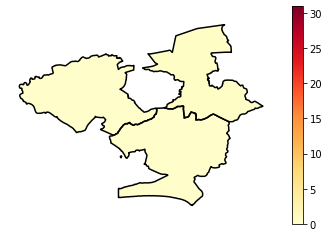

In [70]:
fig, ax = plt.subplots(1,1)
ax.axis('off')
df_bairros[df_bairros['CODBAIRRO'].str.contains('144|151|149')].plot(column = 'Casos3', ax = ax,legend = True, cmap = 'YlOrRd',
                                                                    vmin = 0, vmax = 30.965391621129324)
df_bairros[df_bairros['CODBAIRRO'].str.contains('144|151|149')].boundary.plot(ax = ax, color = 'k')


In [71]:
df_bairros[df_bairros['NOME'] == 'BARRA DA TIJUCA']

,OBJECTID,Área,NOME,REGIAO_ADM,AREA_PLANE,CODBAIRRO,CODRA,CODBNUM,LINK,SHAPESTArea,...,CODBAIRRO_LONG,geometry,Casos,Casos1,Casos2,Casos3,CasosSemana0,CasosSemana1,CasosSemana2,CasosSemana3
127,471,4.815063e+07,BARRA DA TIJUCA,BARRA DA TIJUCA,4,128,24,Barra da Tijuca,Barra da Tijuca &area=128 ...,4.815063e+07,...,128,"MULTIPOLYGON (((-43.40291 -22.97270, -43.40329...",18.098349,16.406227,13.095553,9.637739,2.574968,2.942821,3.237103,1.692122


In [106]:
semanas = [['29/03', '05/04'], ['06/04', '12/04'], ['13/04', '19/04'], ['20/04', '26/04']]

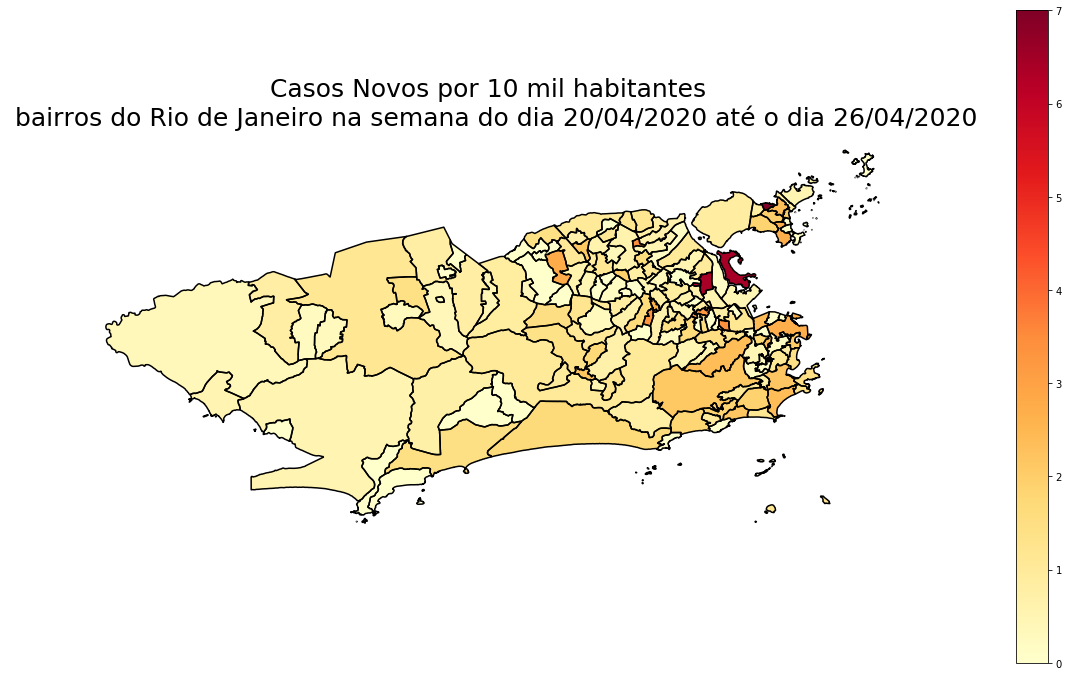

In [90]:
fig1, ax = plt.subplots(1,1, figsize = (20,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = None, add_to_figure =False)
vmin = 0
vmax = 7
i = 3
df_bairros.plot(column = f'CasosSemana%s'%(i), ax = ax,legend = True, cmap = 'YlOrRd', vmin = vmin, vmax = vmax) 
df_bairros.boundary.plot(ax = ax, color = 'k')
ax.axis('off')
#plt.clim((0,40))
#plt.colorbar(boundaries = (0,40))
ax.set_title(f'Casos Novos por 10 mil habitantes \n bairros do Rio de Janeiro na semana do dia %s até o dia %s' %(semanas[i][0], semanas[i][1]), fontsize = 25)
#plt.colorbar(plt.gca().get_children()[0], ax=axes.ravel().tolist())
plt.show()


In [107]:
titles = ['05/04', '12/04', '19/04', '26/04']
titles_semanas = [semana[0] + ' até ' + semana[1] for semana in semanas]

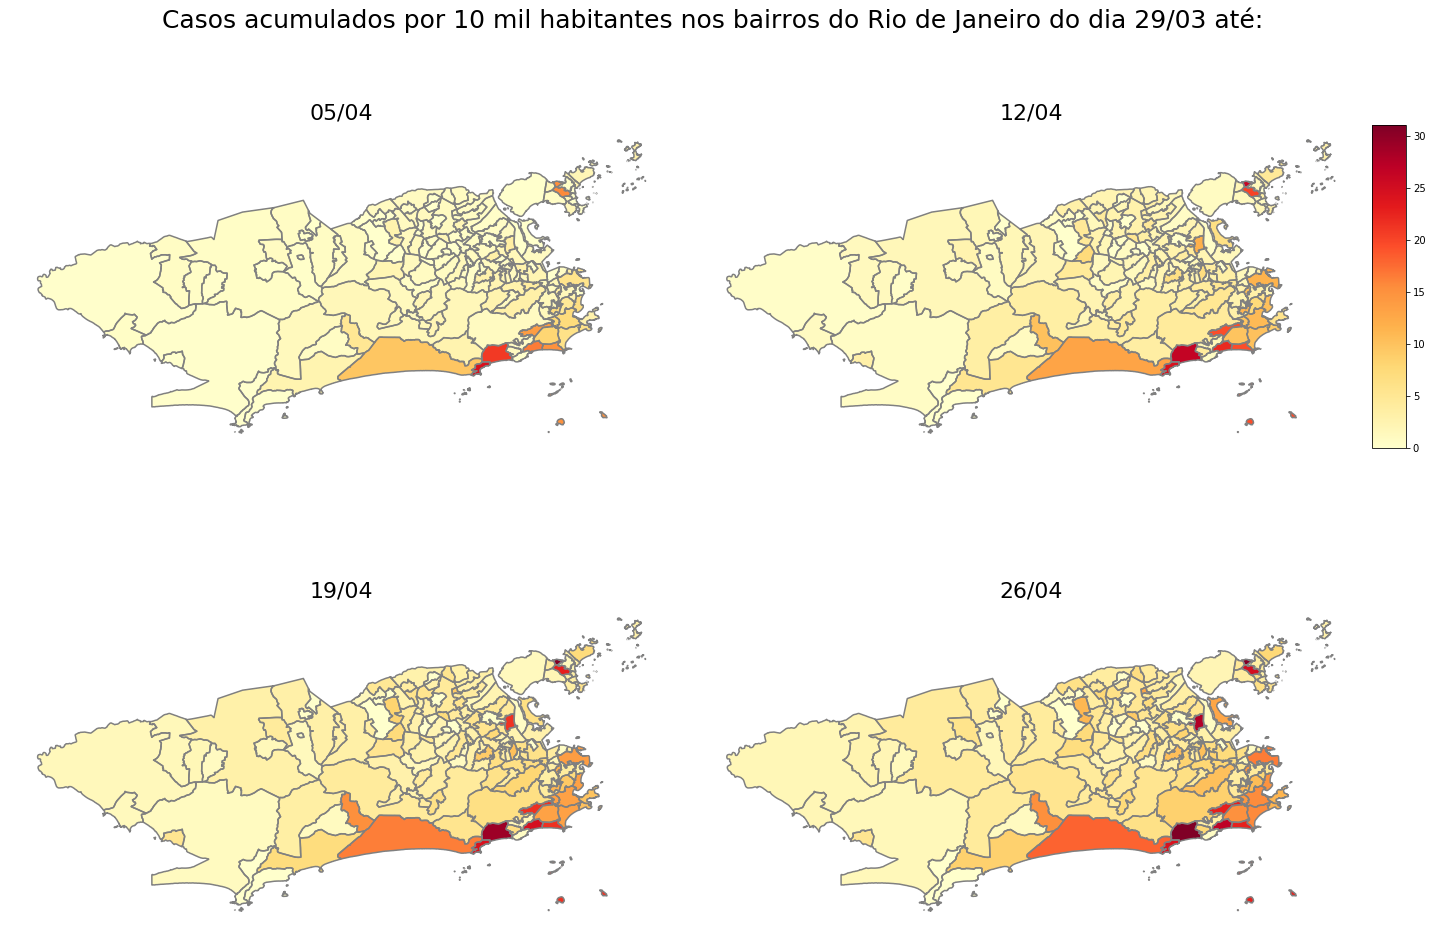

In [131]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize = (20,15))
eixos = [ax1, ax2, ax3, ax4]
divider4 = make_axes_locatable(ax4)
dividers = [make_axes_locatable(eixo) for eixo in eixos]
caxs = [divider.append_axes('right', size = '5%', pad = 0.1, add_to_figure = (i == 1)) for i, divider in enumerate(dividers)]
fig.suptitle('Casos acumulados por 10 mil habitantes nos bairros do Rio de Janeiro do dia 29/03 até: ', fontsize = 25)
for i, col in enumerate(['Casos3', 'Casos2', 'Casos1', 'Casos']):
    ax = eixos[i]
    ax.set_title(titles[i], fontsize = 22)
    df_bairros.plot(column = col, ax = ax, legend = True, cax = caxs[i], cmap = 'YlOrRd', vmin = vmin, vmax = 31)
    df_bairros.boundary.plot(ax = ax, color = 'grey')
    ax.axis('off')
fig.tight_layout()
#plt.colorbar(plt.gca().get_children()[0], ax=axes.ravel().tolist())
plt.show()


In [44]:
max(list(df_bairros['Casos']))

49.413218035824585

In [45]:
df_bairros[df_bairros['NOME'] == 'JOA']

,OBJECTID,Área,NOME,REGIAO_ADM,AREA_PLANE,CODBAIRRO,CODRA,CODBNUM,LINK,SHAPESTArea,...,CODBAIRRO_LONG,geometry,Casos,Casos1,Casos2,Casos3,CasosSemana0,CasosSemana1,CasosSemana2,CasosSemana3
125,479,1.689691e+06,JOA,BARRA DA TIJUCA,4,126,24,Joá,Joá &area=126 ...,1.689691e+06,...,126,"POLYGON ((-43.27559 -23.00329, -43.27603 -23.0...",24.449878,24.449878,24.449878,24.449878,12.224939,0.0,0.0,0.0


In [46]:
df_bairros

,OBJECTID,Área,NOME,REGIAO_ADM,AREA_PLANE,CODBAIRRO,CODRA,CODBNUM,LINK,SHAPESTArea,...,CODBAIRRO_LONG,geometry,Casos,Casos1,Casos2,Casos3,CasosSemana0,CasosSemana1,CasosSemana2,CasosSemana3
0,425,3.638176e+05,SAUDE,PORTUARIA,1,1,1,Saúde,Saúde &area=1 ...,3.638176e+05,...,1,"POLYGON ((-43.18111 -22.89542, -43.18115 -22.8...",3.637686,3.637686,3.637686,3.637686,0.000000,0.000000,0.000000,0.000000
1,420,1.112903e+06,GAMBOA,PORTUARIA,1,2,1,Gamboa,Gamboa &area=2 ...,1.112903e+06,...,2,"POLYGON ((-43.18787 -22.89311, -43.19065 -22.8...",0.762893,0.762893,0.762893,0.762893,0.000000,0.000000,0.000000,0.000000
2,421,1.684721e+06,SANTO CRISTO,PORTUARIA,1,3,1,Santo Cristo,Santo Cristo &area=3 ...,1.684721e+06,...,3,"POLYGON ((-43.19446 -22.90337, -43.19455 -22.9...",6.488240,4.055150,1.622060,0.000000,0.000000,0.811030,0.811030,2.433090
3,482,5.347481e+06,CAJU,PORTUARIA,1,4,1,Caju,Caju &area=4 ...,5.347481e+06,...,4,"MULTIPOLYGON (((-43.22518 -22.87464, -43.22521...",3.418470,2.930117,1.465058,0.976706,0.488353,0.000000,1.465058,0.488353
4,422,5.424739e+06,CENTRO,CENTRO,1,5,2,Centro,Centro &area=5 ...,5.424739e+06,...,5,"MULTIPOLYGON (((-43.17829 -22.89257, -43.17829...",16.579259,13.872441,11.503976,5.751988,3.045170,4.398579,2.368466,2.706818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,341,1.517134e+06,PARQUE COLUMBIA,PAVUNA,3,159,25,Parque Colúmbia,Parque Colúmbia &area=159 ...,1.517134e+06,...,159,"POLYGON ((-43.33088 -22.81265, -43.33235 -22.8...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
159,512,2.534304e+06,GERICINO,BANGU,5,160,17,Gericinó,Gericinó &area=160,2.534304e+06,...,160,"POLYGON ((-43.46926 -22.84046, -43.48255 -22.8...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
160,485,2.983258e+05,LAPA,CENTRO,1,161,2,Lapa,Lapa &area=161,2.983258e+05,...,161,"POLYGON ((-43.18162 -22.91207, -43.18213 -22.9...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
161,890,1.473737e+06,VILA KENNEDY,BANGU,5,162,17,None,Vila Kennedy &area=162,1.473737e+06,...,162,"POLYGON ((-43.48750 -22.86233, -43.48744 -22.8...",0.354962,0.354962,0.000000,0.000000,0.000000,0.000000,0.354962,0.000000


In [47]:
data=[dict(type='cloropleth', autocolorscale = False,

locations = df_bairros['NOME'], z=df[‘dollars’], locationmode=’USA-states’, colorscale=’custom-colorscale’, colorbar=dict(title=’thousand dollars’))]

layout = dict(title=’state spending on public education’, geo=dict(scope=’usa’, projection=dict(type=’albers usa’), showlakes=True, lakecolor=’rgb(66,165,245)’))

fig=dict(data=data, layout=layout)

plt.plot(fig)

SyntaxError: invalid character in identifier (<ipython-input-47-1f7c0201c51d>, line 3)

In [91]:
from PIL import Image, ImageDraw
import imageio

In [98]:
filenames = 6*['imagens/bairros_novos_semana0.png'] + 6*['imagens/bairros_novos_semana1.png'] + 6*['imagens/bairros_novos_semana2.png'] + 6*['imagens/bairros_novos_semana3.png']

In [99]:
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(r"imagens/bairros_novos_geoplot.gif" , images)